# Task 2: Prediction using Unsupervsied Learning(Predict optimum numbers of clusters and represent it visually)

# GRIP @THE SPARK FOUNDATION

# Author: Godwin-Demilade Adegbehingbe.

# December 2021 Batch

In [5]:
# Import Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

In [6]:
#load datasets
iris= pd.read_csv("C:\\Users\\HP PROBOOK 640\\iris.csv")
iris.shape

(150, 6)

In [7]:
#columns in the data sets
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [24]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [15]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
iris['Species']= label_encoder.fit_transform(iris['Species']) 

iris['Species'].unique()

array([0, 1, 2])

In [17]:

X= iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]#independent variable
y=iris['Species']#dependent variable

#Standard Scaling
sc= StandardScaler()
sc.fit(X)
X =sc.transform(X)

In [18]:
#import Kmeans 
from sklearn import cluster
cl_iris =cluster.KMeans(n_clusters=3,n_init=10)
#fitting the Independent variable
cl_iris.fit(X)
cl_iris.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [19]:
print (cl_iris.cluster_centers_)

[[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


In [20]:
#Evaluation
from sklearn.metrics import silhouette_score
print(silhouette_score(X,cl_iris.labels_))

0.4589717867018717


In [22]:
#inertia
cl_iris.inertia_

140.96581663074699

In [23]:
#score
cl_iris.score(X)

-140.96581663074699

# Finding the optimum number of Clusters 

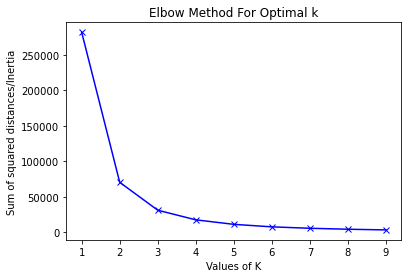

In [21]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(iris)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k=3 (i.e. Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 3.
The Optimum number of Clusters is 3

In [26]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

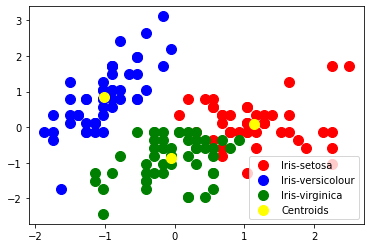

In [28]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()